Data Visualization

## Project 3

Due date: 11:59 pm, 3/9/2022

**Requirements**

- The best way to do this project is to open this file in Google Colab or Jupyter Notebook, enter your code in the blank cell under each question, and run it. 

- Each question is worth 10 points.

- You must write code using Plotly Python API to create the charts. You can use Plotly Express. You must submit both the figures and source code. 

- **Do not use the online Plotly Chart Studio Editor.** 

- The data files used in this project are included in a separate Zip file. Place the data files in your current working directory. If you are not sure where your Jupyter working directory is, please read my Python Notes.

- Submit two things. 
  - First, submit a text file that contains the link to your Ipynb file in Google Colab. Make sure your Ipynb file in Google Colab is shared so that anyone with the link can view. Do not put this link in public. If you don't use Google Colab, include the Ipynb file itself. 

  - Second, include a PDF printout of your Ipynb file. Because the interactive Plotly charts may not be printed properly, it's better to take screenshots, paste them to a Word file, and then save or print to PDF. Make sure this file includes both source code and output. This will make it easier for my TA and I to check your answers. Do not submit only the source code without output or the output without the source code.

  - You can put the two files in a Zip file and submit the Zip file.

- Do not submit by email.

### Part 1 Plotly

- Load **HollywoodsMostProfitableStories.csv** and use Plotly to create the following charts. Every figure must include a title. Each axis must be labeled. 
- This dataset has a few missing data values. Your code should ignore the missing data values when calculating the averages. 

1. Create a bar chart showing the top 10 most profitable films. The X-axis is the film title. The Y-axis is profitability. The bars should be sorted from the most to the least profitable.

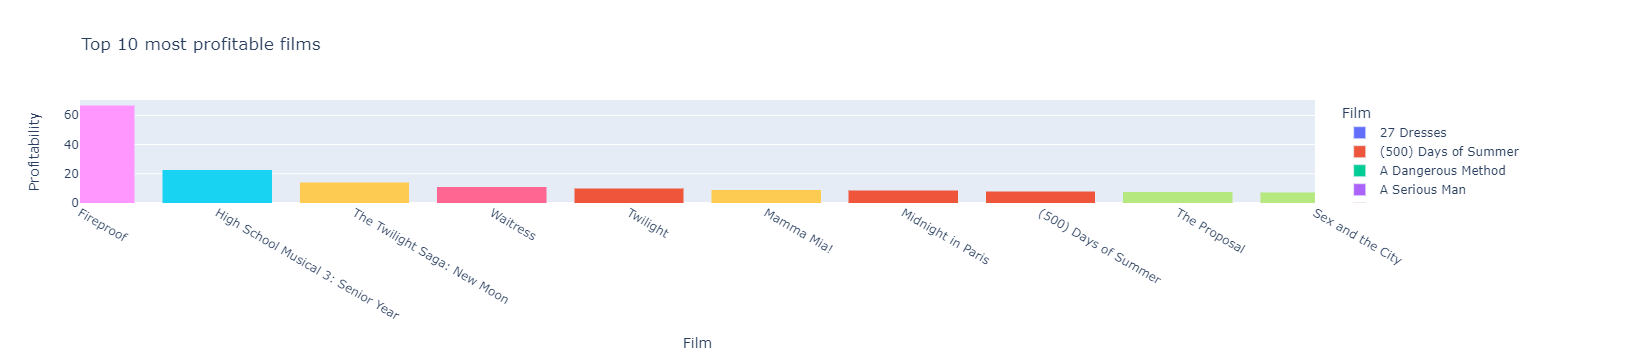

In [2]:
import pandas as pd
import plotly.express as px
col_list = [ "Profitability","Film"]
df = pd.read_csv('HollywoodsMostProfitableStories.csv', usecols=col_list)
fig = px.bar(df, x = 'Film', y = 'Profitability', title='Top 10 most profitable films',color='Film',barmode='stack')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.update_xaxes(range=(-.0, 9))
fig.show()

2.	Create a histogram showing the number of films for each Genre. The X-axis is the Genre. The Y-axis is the number of films in the spreadsheet from each Genre. 

In [1]:
# import all modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the DataFrame
df = pd.read_csv('HollywoodsMostProfitableStories.csv')
plt.hist(data['Genre','Film'], bins=10, alpha=.5)

plt.xlabel("Genre")
#histogram y axis label
plt.ylabel("Number of movies")
plt.show()

NameError: name 'data' is not defined

3.	Create a line chart showing the average Profitability of the films for each year. The X-axis is the Year. The Y-axis is the average Profitability for each year. 

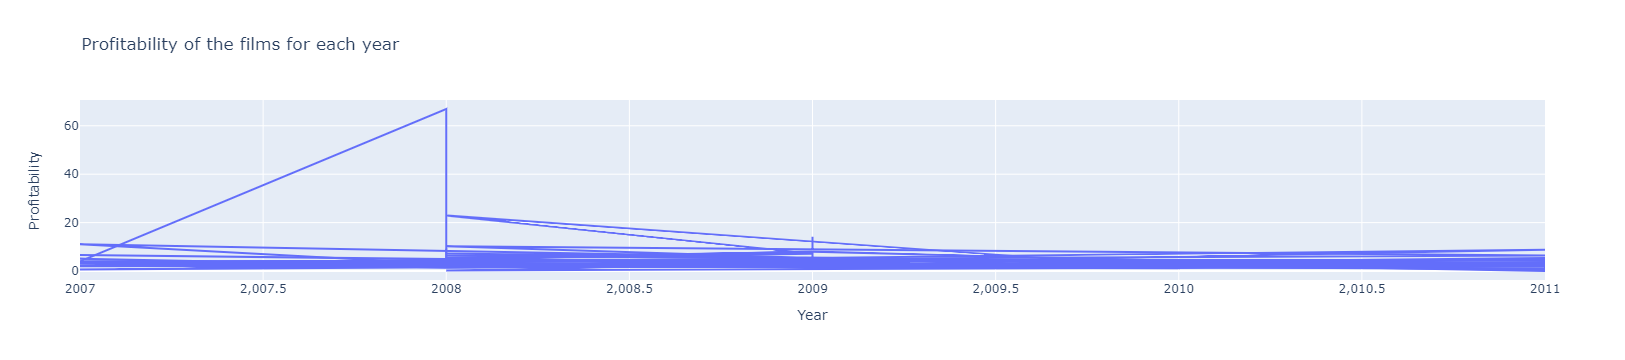

In [6]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('HollywoodsMostProfitableStories.csv')

fig = px.line(df, x = 'Year', y = 'Profitability', title='Profitability of the films for each year')
fig.show()

4.	Create a dot plot showing the top 10 films with the highest Rotten Tomatoes %. The X-axis is the Rotten Tomatoes %. The Y-axis is the film title. 

In [4]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read.csv('HollywoodsMostProfitableStories.csv')

print(data)

plot(x = Year,y = Film,
	xlab = "x-axis",
	ylab = "y-axis",
	main = "Plot"
)


AttributeError: module 'pandas' has no attribute 'read'

5.	Create a boxplot showing the maximum, minimum, median, first quartile, and third quartile of profitability for each Genre. The X-axis is the Genre. It should be a single figure but with multiple boxplots, one for each Genre. 

6.	Create a single figure with two bar plots. One plot shows the top 10 films with biggest Worldwide Gross. The second plot shows the top 10 films with the largest Audience. The X-axis is the film index (not title). When the mouse cursor hovers over a bar, the film’s title should be displayed in the tooltip. 

### Part 2: Plotly Dash

7. Load **wimbledons_champions_cleaned.csv**. Create a Plotly Dash application that has the following UI components:<br>
- A range slider for “Year”. The range slider allows users to choose a range of years.
- A checklist for “Gender”. The checklist has two options: "Men" and "Women". The default is to check both boxes. 

There should be two plots in this Dash application. 
- A histogram that shows the number of champions for each country. 
- A histogram that shows the number of runner-ups for each country. 

The plots should be automatically updated if a user interacts with the UI. 

In [7]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import pandas as pd

app = Dash(__name__)

app.layout = html.Div([
    html.H4('Simple stock plot with adjustable axis'),
    html.Button("Switch Axis", n_clicks=0, 
                id='button'),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"), 
    Input("button", "n_clicks"))
def display_graph(n_clicks):
    df = pd.read_csv('wimbledons_champions_cleaned.csv') # replace with your own data source

    if n_clicks % 2 == 0:
        x, y = 'Year', 'Gender'
    else:
        x, y = 'Gender', 'Year'

    fig = px.line(df, x=x, y=y)    
    return fig


app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)


8. Load **walmart_store_openings.csv**. Create a Plotly Dash application that has the following UI components:<br>
- A Dropdown menu for “STRSTATE”. A user should be able to select multiple states.
- RadioItems for “type_store”. There are two options: "Supercenter" and "Wal-Mart". The default is to check "Supercenter". A user should be able to choose either one. 

There should be two plots in this Dash application. 
- A line chart that shows the number of stores opened per year. The X-axis is the year. The Y-axis is the number of store opened. 
- A bar chart that shows the number of stores opened for each state. The X-axis is the number of stores. The Y-axis is the state.

The plots should be automatically updated if a user interacts with the UI. 

In [2]:
import json
import datetime
from textwrap import dedent as d
import dash
from dash.dependencies import Input, Output
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd

df = pd.read_csv(
    ('walmart_store_openings.csv'),
    parse_dates=[1, 2],
    infer_datetime_format=True
)
future_indices = df['OPENDATE'] > datetime.datetime(year=2050,month=1,day=1)
df.loc[future_indices, 'OPENDATE'] -= datetime.timedelta(days=365.25*100)

app = dash.Dash(__name__)
app.scripts.config.serve_locally = True
app.css.config.serve_locally = True

styles = {
    'pre': {
        'border': 'thin lightgrey solid',
        'overflowX': 'scroll'
    }
}

app.layout = html.Div([
    dcc.Graph(
        id='basic-interactions',
        figure={
            'data': [
                {
                    'x': df['OPENDATE'],
                    'text': df['STRCITY'],
                    'customdata': df['storenum'],
                    'name': 'Open Date',
                    'type': 'histogram'
                },
                {
                    'x': df['date_super'],
                    'text': df['STRCITY'],
                    'customdata': df['storenum'],
                    'name': 'Super Date',
                    'type': 'histogram'
                }
            ],
            'layout': {}
        }
    ),

    html.Div(className='row', children=[
        html.Div([
            dcc.Markdown(d("""
                **Hover Data**
                Mouse over values in the graph.
            """)),
            html.Pre(id='hover-data', style=styles['pre'])
        ], className='three columns'),

        html.Div([
            dcc.Markdown(d("""
                **Click Data**
                Click on points in the graph.
            """)),
            html.Pre(id='click-data', style=styles['pre']),
        ], className='three columns'),

        html.Div([
            dcc.Markdown(d("""
                **Selection Data**
                Choose the lasso or rectangle tool in the graph's menu
                bar and then select points in the graph.
            """)),
            html.Pre(id='selected-data', style=styles['pre']),
        ], className='three columns'),

        html.Div([
            dcc.Markdown(d("""
                **Zoom and Relayout Data**
                Click and drag on the graph to zoom or click on the zoom
                buttons in the graph's menu bar.
                Clicking on legend items will also fire
                this event.
            """)),
            html.Pre(id='relayout-data', style=styles['pre']),
        ], className='three columns')
    ])
])


@app.callback(
    Output('hover-data', 'children'),
    [Input('basic-interactions', 'hoverData')])
def display_hover_data(hoverData):
    return json.dumps(hoverData, indent=2)


@app.callback(
    Output('click-data', 'children'),
    [Input('basic-interactions', 'clickData')])
def display_click_data(clickData):
    return json.dumps(clickData, indent=2)


@app.callback(
    Output('selected-data', 'children'),
    [Input('basic-interactions', 'selectedData')])
def display_selected_data(selectedData):
    return json.dumps(selectedData, indent=2)


@app.callback(
    Output('relayout-data', 'children'),
    [Input('basic-interactions', 'relayoutData')])
def display_selected_data(relayoutData):
    return json.dumps(relayoutData, indent=2)


if __name__ == '__main__':
    app.run_server(debug=True)

C:\Users\David\AppData\Local\Temp/ipykernel_13116/647695960.py:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\David\AppData\Local\Temp/ipykernel_13116/647695960.py:7: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1

C:\Users\David\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### Part 3: Seaborn

Load **wimbledons_champions_cleaned.csv** and use Seaborn to create the following charts. 

9. Create a Stripplot showing when athletes from different countries won the championship. The Y-axis is the country. The X-axis is the year. Each dot indicates a player from a certain country won the championship in a certain year. The circles should be filled with green color. You don't need to display the athletes' names. 

10. reate a FaceGrid with four subplots. In the first row, show two plots: a histogram showing the number of men’s champions for different countries and a histogram showing the number of women’s champions for different countries. In the second row, show two charts: a histogram showing the number of men’s runners-up for different countries and a histogram showing the number of women’s runners-up for different countries.